Team: Jocelyn Rupp and Julia Rushton
CS 5324 - Lab 1

In your own words, give an overview of the dataset. Describe the purpose of the data set you selected (i.e., why and how was this data collected in the first place?).

The dataset selected is called “Vehicle collision data in Seattle 2005 - 2019”. This dataset contains information regarding the location, severity, climate, date, time, and emergency response time for car accidents in Seattle, Washington. This dataset is a collection of data from both Seattle’s open data portal about car accidents reported in the city and from the National Oceanic and Atmospheric Administration’s (NOAA) data tools. Data from these two sources were combined to form the Vehicle collision data in Seattle 2005 - 2019 dataset. Seattle tracks information about all car accidents because they have to have every incident on record for legal purposes. The NOAA is a science - based federal agency that is responsible for tracking and forecasting weather, oceanic conditions and atmospheric conditions. So, the information in the dataset being used in this lab regarding weather conditions is from the NOAA. 

What is the prediction task for your data and why are other third parties interested in the result? 

The prediction task for our data is to predict the probability of car accidents occuring in different weather and road conditions. Our questions include the following: 
Question 1: What is the relationship between each of the road conditions and the level of severity of the collision?"
Question 2: What is the relationship between each of the weather conditions and the level of severity of the collision?
Question 3: What is the correlation between speeding, driving under the influence, inattention while driving, and the sevreity level of the collision?
Third parties such as Seattle’s police and fire departments would value this prediction because they can alter their staff and resources based on the predicted demand for certain weather conditions. 


Once you begin modeling, how well would your prediction algorithm need to perform to be considered useful to these third parties?

Since our data is just being used to help fire and police departments to supply ample staff and resources during certain weather conditions, our prediction algorithm needs to perform better than 50%. A 50% performance is equivalent to someone randomly guessing if there will be more car accidents given a certain weather condition. 


In [18]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import folium

#df = pd.read_csv('/Users/juliarushton/Desktop/seattle_collision_data_2005_2019.csv')
df = pd.read_csv('../seattle_collision_data_2005_2019.csv')
df.head()

,Unnamed: 0,longitude,latitude,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,...,response_type,response_time,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WSF5
0,1,-122.324322,47.613755,0,Parked Car,2,0,0,2,0,...,NaN,NaN,9.4,0.0,NaN,NaN,33.0,38,27,17.0
1,2,-122.321556,47.571558,0,Rear Ended,3,0,0,3,0,...,NaN,NaN,9.4,0.0,NaN,NaN,33.0,38,27,17.0
2,3,-122.344164,47.555769,1,Head On,2,0,0,2,1,...,NaN,NaN,9.4,0.0,NaN,NaN,33.0,38,27,17.0
3,4,-122.309400,47.608484,1,Rear Ended,2,0,0,2,1,...,Motor Vehicle Accident,36.0,9.4,0.0,NaN,NaN,33.0,38,27,17.0
4,5,-122.319746,47.674521,0,Left Turn,2,0,0,2,0,...,NaN,NaN,9.4,0.0,NaN,NaN,33.0,38,27,17.0


In [19]:
print(df.dtypes)
print('===========')
print(df.info())

Unnamed: 0                int64
longitude               float64
latitude                float64
SEVERITYCODE              int64
COLLISIONTYPE            object
PERSONCOUNT               int64
PEDCOUNT                  int64
PEDCYLCOUNT               int64
VEHCOUNT                  int64
INJURIES                  int64
SERIOUSINJURIES           int64
FATALITIES                int64
JUNCTIONTYPE             object
INATTENTIONIND             bool
UNDERINFL                  bool
WEATHER                  object
ROADCOND                 object
LIGHTCOND                 int64
SPEEDING                   bool
HITPARKEDCAR               bool
SPDCASENO                object
DATE                     object
TIME                    float64
intersection_related       bool
response_type            object
response_time           float64
AWND                    float64
PRCP                    float64
SNOW                    float64
SNWD                    float64
TAVG                    float64
TMAX    

# Data Understanding

Load the dataset and appropriately define data types. What data type should be used to represent each data attribute? Discuss the attributes collected in the dataset. For datasets with a large number of attributes, only discuss a subset of relevant attributes.  

 Verify data quality: Explain any missing values or duplicate data. Visualize entries that are missing/complete for different attributes. Are those mistakes? Why do these quality issues exist in the data? How do you deal with these problems? Give justifications for your methods (elimination or imputation).
 
The data types necessary to analyze this data are a variety of data types. Location variables such as the longitude and latitude as well as time, precipitation are of type float64. A few variables such as, collision type, junction type, weather, road conditions, and date are of type object. Other variables are boolean values represented as values of true or false. The boolean variables are inattention of driver, under the influence, hit parked car, and whether the collision was intersection related. The remaining variables in the dataset are integer data types. This allows for comparing and contrasting accident counts, severity levels, and precipitation intensity. A few key attributes of this data set are fatalities, speeding, and severity code. We did not need to change any of the original data types of the variables, which made graphing this dataset very easy. For example, it was helpful to have a boolean value when considering if someone was speeding or not in correlation to an accident. The variables that had missing values or little data were ‘SNOW’, ‘SNWD’, ‘response_type’, and ‘response_time’. The data in the two columns relating to snow were all ‘NA’ which can be interpreted as meaning snowy road conditions are not an important factor in downtown Seattle. Because of the lack of data and relevance to our analysis, we eliminated the two columns for snow and snow wheel drive. Although the columns for response time and type had many missing values represented as ‘NA’, we decided to keep these two columns in our data frame in case we wanted to look at their relationship with other variables, such as weather conditions, later on. The creator of this data set used a combination of two different sources and cleaned it to use for a project so the data set was essentially ready to use when we obtained it because there was very little cleaning or imputing necessary. The data types necessary to analyze this data are a variety of data types. Location variables such as the longitude and latitude as well as time, precipitation are of type float64. A few variables such as, collision type, junction type, weather, road conditions, and date are of type object. Other variables are boolean values represented as values of true or false. The boolean variables are inattention of driver, under the influence, hit parked car, and whether the collision was intersection related. The remaining variables in the dataset are integer data types. This allows for comparing and contrasting accident counts, severity levels, and precipitation intensity. A few key attributes of this data set are fatalities, speeding, and severity code. We did not need to change any of the original data types of the variables, which made graphing this dataset very easy. For example, it was helpful to have a boolean value when considering if someone was speeding or not in correlation to an accident. The variables that had missing values or little data were ‘SNOW’, ‘SNWD’, ‘response_type’, and ‘response_time’. The data in the two columns relating to snow were all ‘NA’ which can be interpreted as meaning snowy road conditions are not an important factor in downtown Seattle. Because of the lack of data and relevance to our analysis, we eliminated the two columns for snow and snow wheel drive. Although the columns for response time and type had many missing values represented as ‘NA’, we decided to keep these two columns in our data frame in case we wanted to look at their relationship with other variables, such as weather conditions, later on. The creator of this data set used a combination of two different sources and cleaned it to use for a project so the data set was essentially ready to use when we obtained it because there was very little cleaning or imputing necessary. 

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

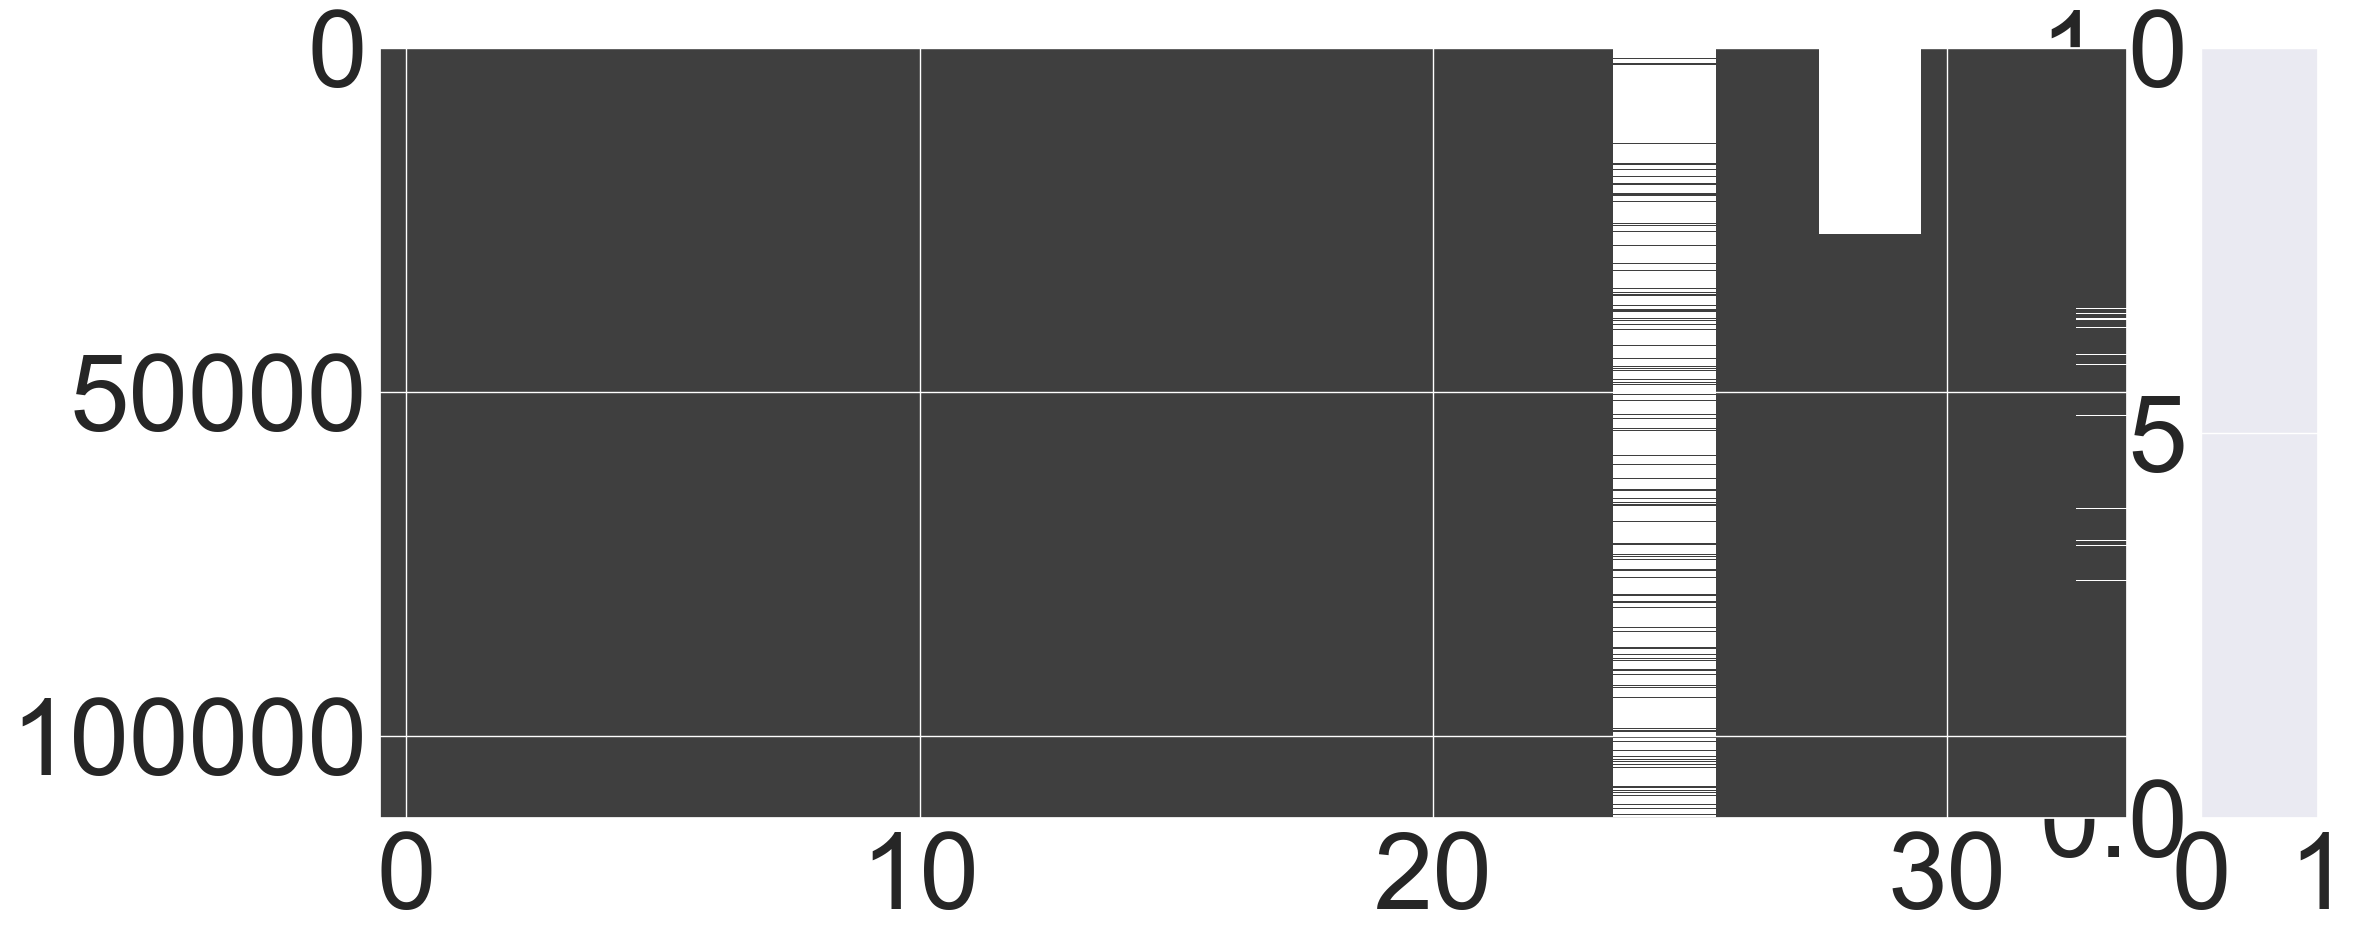

In [20]:
import matplotlib
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

# External package: conda install missingno 
import missingno as mn

mn.matrix(df)
plt.title("Not Sorted",fontsize=22)

plt.figure()
#mn.matrix(df.sort_values(by=["Cabin","Age"]))
#plt.title("Sorted",fontsize=22)
plt.show()

In [ ]:
# 1. Remove attributes that arent useful for us
for col in ['WSF5','TMIN','TMAX', 'SNOW', 'SNWD', 'response_type', 'response_time']:
    if col in df:
        del df[col]
        
df.info()

Removed 'WSF5','TMIN','TMAX', 'SNOW', 'SNWD', 'response_type', 'response_time'. Data of temperature and snow was not useful for us. In considering vehicle crash data and weather conditions, response type and time was not needed.

# Data Visualization

Describe anything meaningful or potentially useful you discover from these visualizations. 

Visualize at least five plots, at least one categorical. 


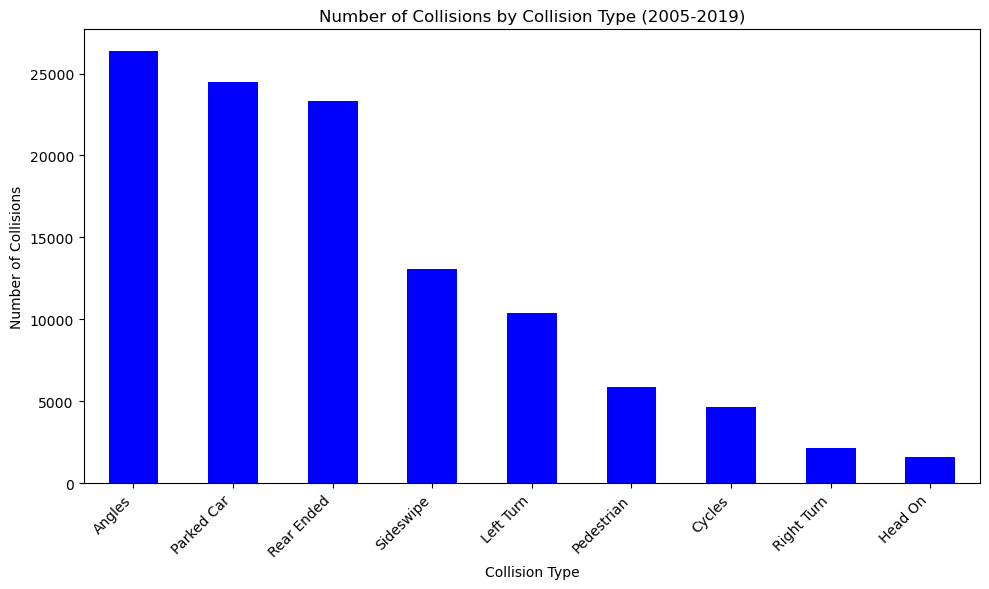

In [5]:
collision_type_counts = df['COLLISIONTYPE'].value_counts()

plt.figure(figsize=(10, 6))
collision_type_counts.plot(kind='bar', color='blue')
plt.title('Number of Collisions by Collision Type (2005-2019)')
plt.xlabel('Collision Type')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show()


Categorical Data

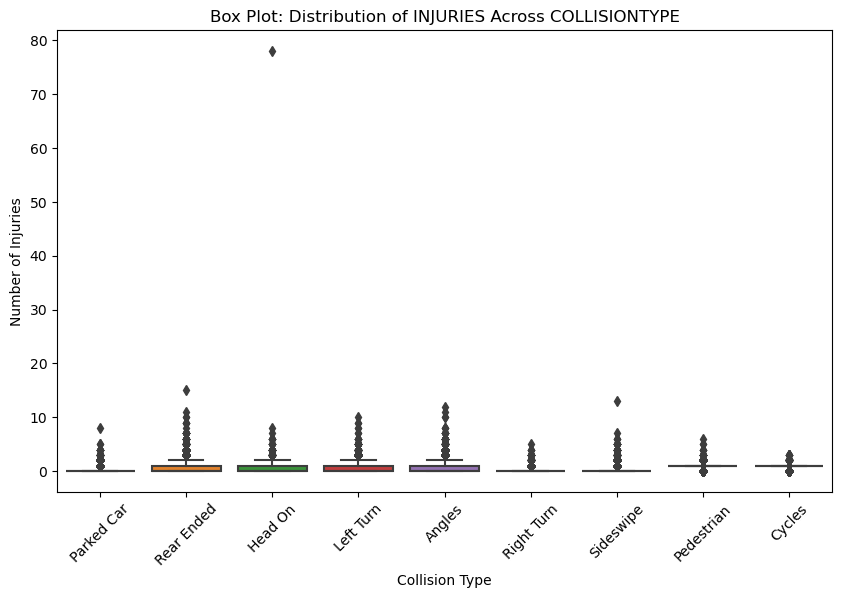

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='COLLISIONTYPE', y='INJURIES', data=df)
plt.title('Box Plot: Distribution of INJURIES Across COLLISIONTYPE')
plt.xlabel('Collision Type')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=45)
plt.show()


This bar chart tells us that the most common collision type are angled collisions, rear ends, and parked car collisions. 

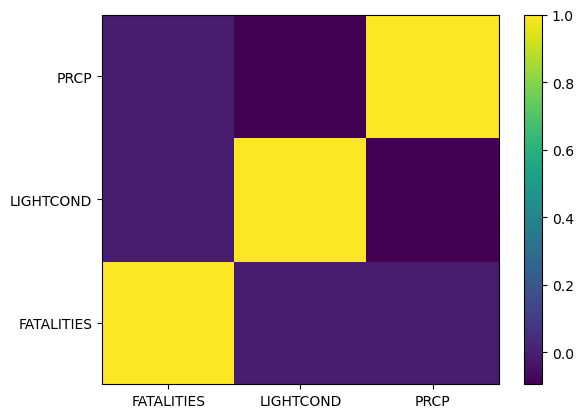

In [7]:
vars_to_use = ['FATALITIES', 'LIGHTCOND', 'PRCP'] # pick vars
plt.pcolor(df[vars_to_use].corr()) 

# fill in the indices
plt.yticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.xticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.colorbar()
plt.show()


Closer to yellow (Closer to 1) means two variables are stronly positively correlated.  Colors closer to dark purple (closer to 0) mean weaker or no correlations.In conlusion from this graph: there is a very slight correlation between Fatalities and Lightcondition and percipitation

In [8]:
fatal_accidents = df[df['FATALITIES'] > 0]

fatal_accidents = fatal_accidents.dropna(subset=['latitude', 'longitude'])

map_center = [fatal_accidents['latitude'].mean(), fatal_accidents['longitude'].mean()]
fatal_accident_map = folium.Map(location=map_center, zoom_start=12)

for idx, row in fatal_accidents.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,  # Increased radius for better visibility
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7
    ).add_to(fatal_accident_map)

fatal_accident_map



This map visualizes the location of fatalies within Seattle. We can assume that the city has more clustered data because higher population means higher fatality rate compared to more suburban areas. When considering third parties like police forces this anaylsis would be helpful for more traffic law enforcement. 

In [10]:
import polars as pl
import seaborn as sns
import statsmodels.formula.api as sm

#data = pl.read_csv("/Users/juliarushton/Desktop/seattle_collision_data_2005_2019.csv",
#                   infer_schema_length = 0, null_values = ["NA"])
    
data = pl.read_csv("'../seattle_collision_data_2005_2019.csv'",
                   infer_schema_length = 0, null_values = ["NA"])


data = data.with_columns(pl.col("longitude").cast(float),
                         pl.col("latitude").cast(float),
                         pl.col("SEVERITYCODE").cast(str))

sns.scatterplot(data.to_pandas(), 
               x = "longitude",
               y = "latitude",
               hue = "SEVERITYCODE",
               alpha = 0.5,
               s = 2)

plt.show()


ModuleNotFoundError: No module named 'polars'

Looking at this map one can see that majority of the accidents are characterized at a severity level of 0 and 1. This means that the accidents were not fatal and there was predominately just vechile damage.

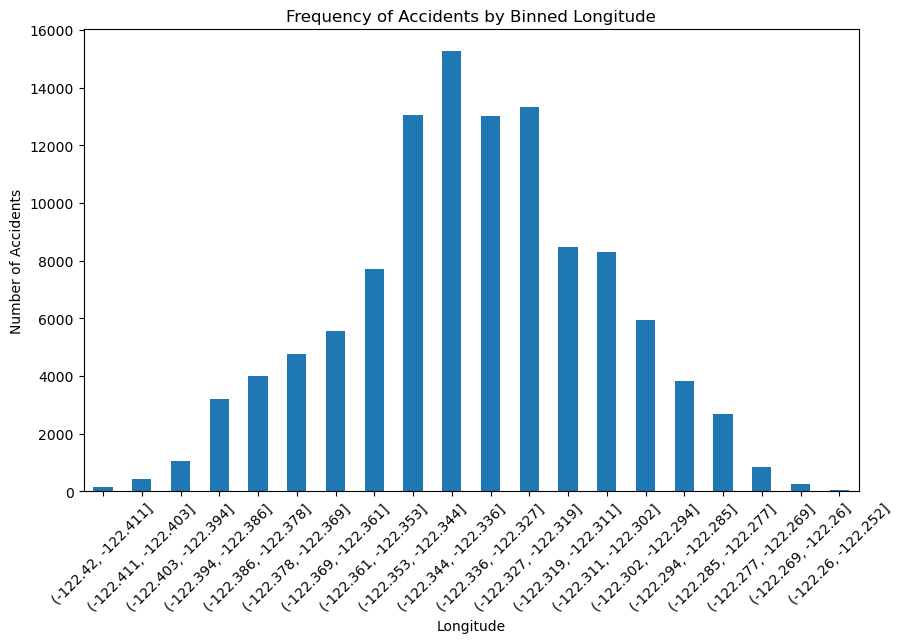

In [11]:
df['longitude_bin'] = pd.cut(df['longitude'], bins=20) 

longitude_frequency = df['longitude_bin'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
longitude_frequency.plot(kind='bar')
plt.title('Frequency of Accidents by Binned Longitude')
plt.xlabel('Longitude')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


This bar chart tells us the longitude and latitude coordinates that experience the vehicle crashes. This chart could be useful for Seattle as the police can see areas that need more enforced traffic safety measures.  

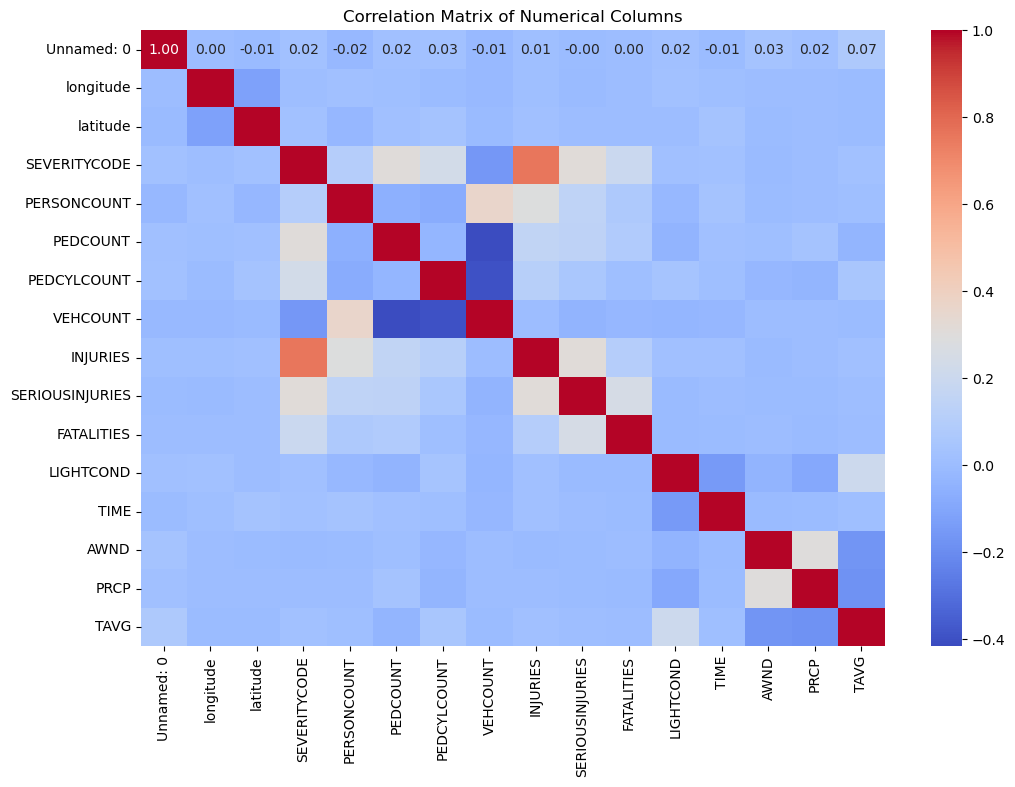

In [12]:
numerical_columns = df.select_dtypes(include=['int64', 'float64'])


correlation_matrix = numerical_columns.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

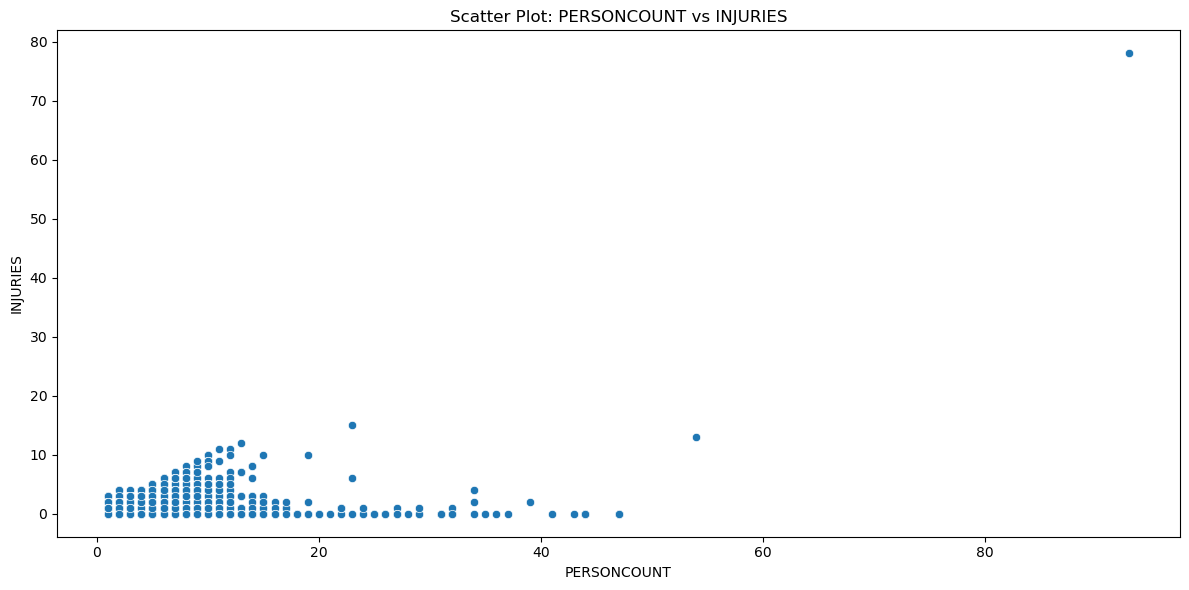

In [17]:
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
scatter_pairs = [('PERSONCOUNT', 'INJURIES')]


plt.figure(figsize=(12, 6))
for i, pair in enumerate(scatter_pairs, 1):
    plt.subplot(1, len(scatter_pairs), i)
    sns.scatterplot(x=pair[0], y=pair[1], data=df)
    plt.title(f'Scatter Plot: {pair[0]} vs {pair[1]}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])

plt.tight_layout()
plt.show()

Number of people involved in car collision vs the number of those people that were injured

In [13]:
# numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_columns)

Index(['Unnamed: 0', 'longitude', 'latitude', 'SEVERITYCODE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'LIGHTCOND', 'TIME', 'AWND', 'PRCP', 'TAVG'],
      dtype='object')


In [14]:
relevant_numerical_columns = ['SEVERITYCODE', 'PERSONCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES']

In [15]:
sns.set(font_scale=7) 

# pairplots to show overview of relationships between variables
sns.pairplot(df[relevant_numerical_columns], height=15)
plt.show()

We could not figure out how to make each plot larger to see but wanted to include this image because it provides a good view of overall relationships between a few of the variables.

# Question 1: What is the relationship between each of the road conditions and the level of severity of the collision?

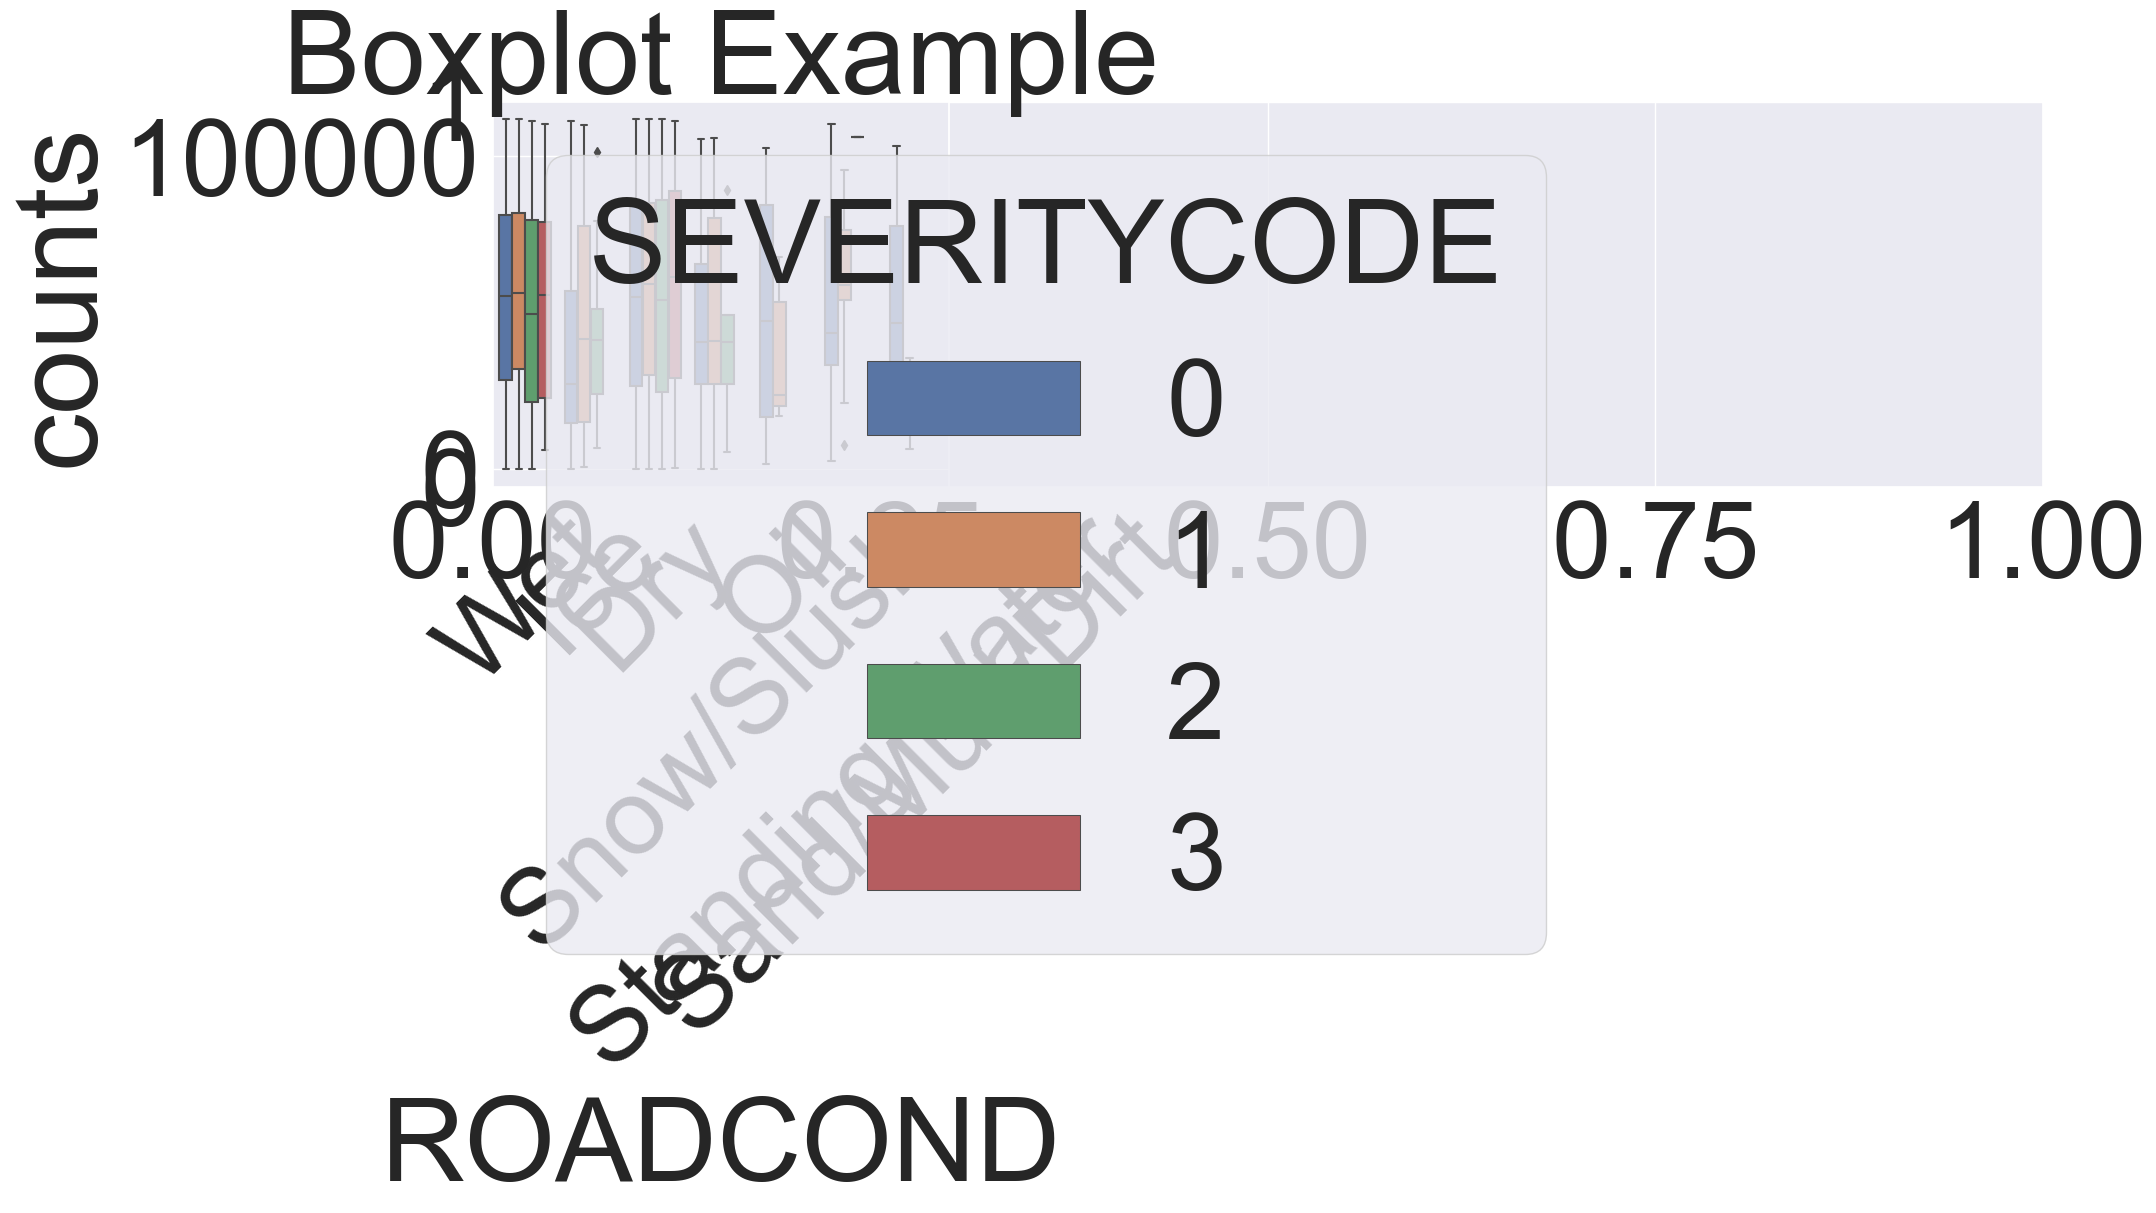

In [16]:
# sns boxplot
plt.subplots(figsize=(20, 5))

# w_counts = pd.read_csv('/Users/juliarushton/Desktop/with_count.csv')
w_counts = pd.read_csv('../with_count.csv')

plt.subplot(1,3,1)
sns.boxplot(x="ROADCOND", y="counts", hue="SEVERITYCODE", data=w_counts)
plt.title('Boxplot Example')


plt.xticks(rotation=45)
plt.show()

# Question 2: What is the relationship between the weather conditions and the level of severity of the collision?

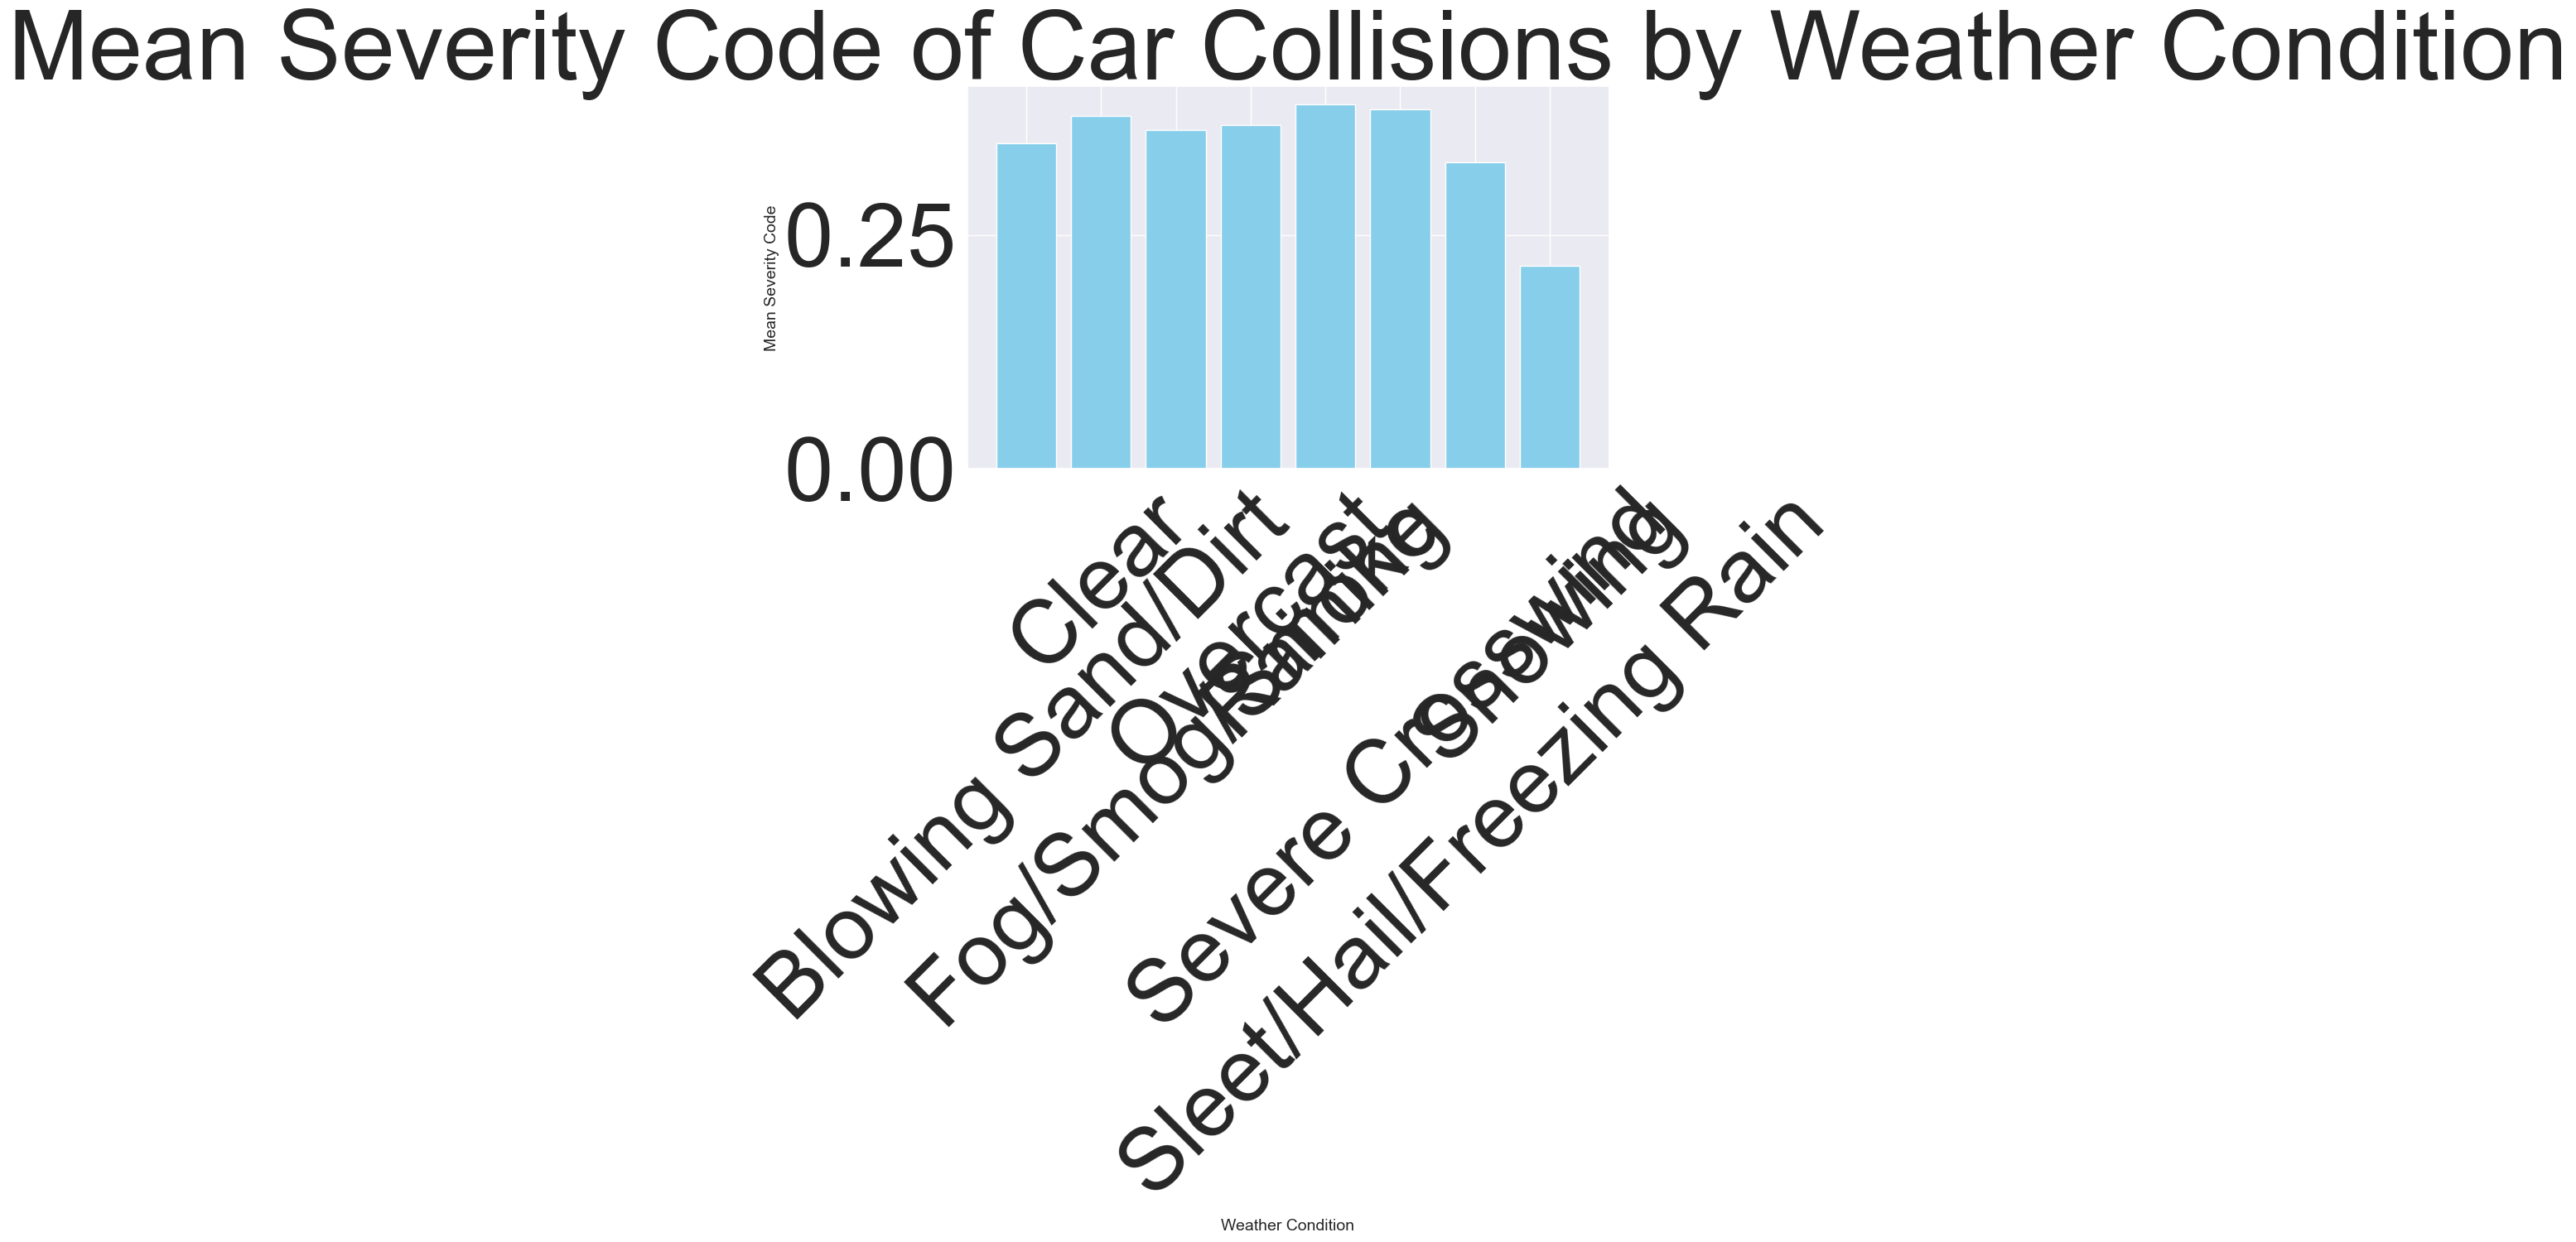

In [17]:
severity_by_weather = df.groupby('WEATHER')['SEVERITYCODE'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(severity_by_weather['WEATHER'], severity_by_weather['SEVERITYCODE'], color='skyblue')
plt.xlabel('Weather Condition', fontsize = 14)
plt.ylabel('Mean Severity Code', fontsize = 14)
plt.title('Mean Severity Code of Car Collisions by Weather Condition')
plt.xticks(rotation=45)
plt.show()

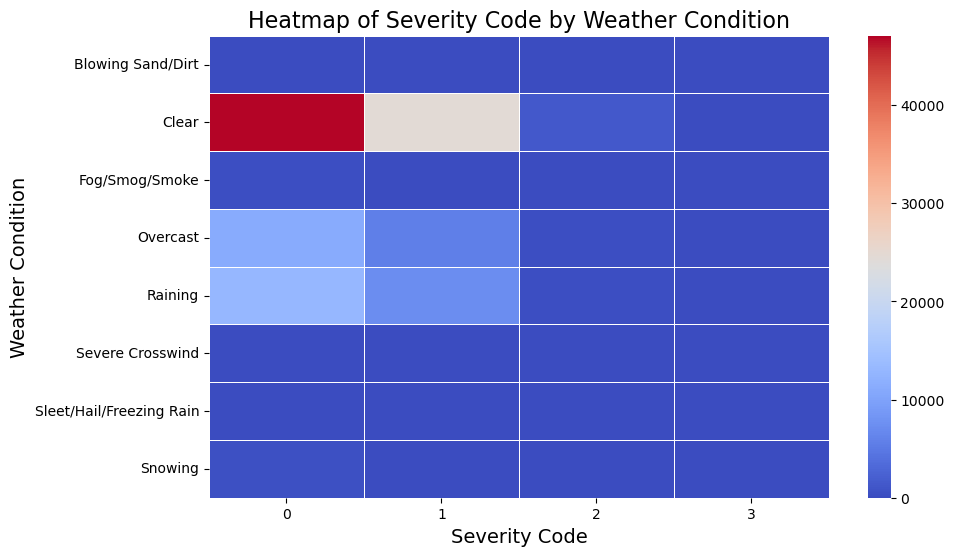

In [14]:
heatmap_data = df[['WEATHER', 'SEVERITYCODE']].pivot_table(index='WEATHER', columns='SEVERITYCODE', aggfunc=len, fill_value=0)


plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False, linewidths=.5)
plt.xlabel('Severity Code', fontsize=14)
plt.ylabel('Weather Condition', fontsize=14)
plt.title('Heatmap of Severity Code by Weather Condition', fontsize=16)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['SEVERITYCODE'], df['PRCP'], color='skyblue', alpha=0.5)
plt.xlabel('Severity Code', fontsize=14)
plt.ylabel('Amount of Precipitation (PRCP)', fontsize=14)
plt.title('Relationship between PRCP and Severity Code', fontsize=16)
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='SEVERITYCODE', y='PRCP', data=df, palette='coolwarm')
plt.xlabel('Severity Code', fontsize=14)
plt.ylabel('Amount of Precipitation (PRCP)', fontsize=14)
plt.title('Box plot of Precipitation by Severity Code of Collision', fontsize=16)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='SEVERITYCODE', hue='SPEEDING', data=df, palette='coolwarm')
plt.xlabel('Severity Code', fontsize=14)
plt.ylabel('Count of Collisions', fontsize=14)
plt.title('Count of Collisions Involving Speeding by Severity Code', fontsize=16)
plt.legend(title='Speeding', labels=['No', 'Yes'])
plt.show()

In [ ]:
plt.hist2d(x=df.PRCP, y=df.SEVERITYCODE, bins=30)
plt.colorbar()
plt.title('Correlation Between Amount Precipitation and Severity of Collision', fontsize=12)
plt.xlabel("PRCP")
plt.ylabel("SEVERITY CODE")
plt.show()

# Question 3: What is the correlation between speeding, driving under the influence and inattention while driving and the severity level of the collision?

In [ ]:
count_by_severity = df.groupby('SEVERITYCODE')['UNDERINFL'].value_counts().unstack().fillna(0)

print("Under the influence counts:")
for severity_code, counts in count_by_severity.iterrows():
    print(f"  SEVERITYCODE: {severity_code}")
    print(f"  True: {counts[True]}, False: {counts[False]}")
    print()


count_by_severity_speed = df.groupby('SEVERITYCODE')['SPEEDING'].value_counts().unstack().fillna(0)


print("Speeding counts:")
for severity_code, counts in count_by_severity_speed.iterrows():
    print(f"  SEVERITYCODE: {severity_code}")
    print(f"  True: {counts[1]}, False: {counts[0]}")
    print()


count_by_severity_inatten = df.groupby('SEVERITYCODE')['INATTENTIONIND'].value_counts().unstack().fillna(0)

print("Inattentive driving counts:")
for severity_code, counts in count_by_severity_inatten.iterrows():
    print(f"  SEVERITYCODE: {severity_code}")
    print(f"  True: {counts[True]}, False: {counts[False]}")
    print()

<Figure size 1000x600 with 0 Axes>

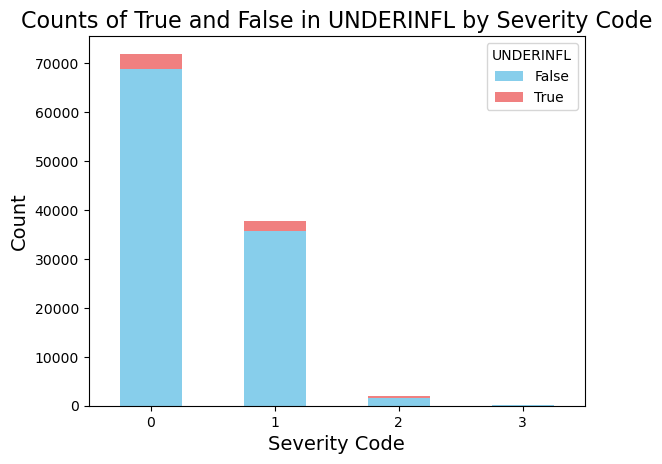

<Figure size 1000x600 with 0 Axes>

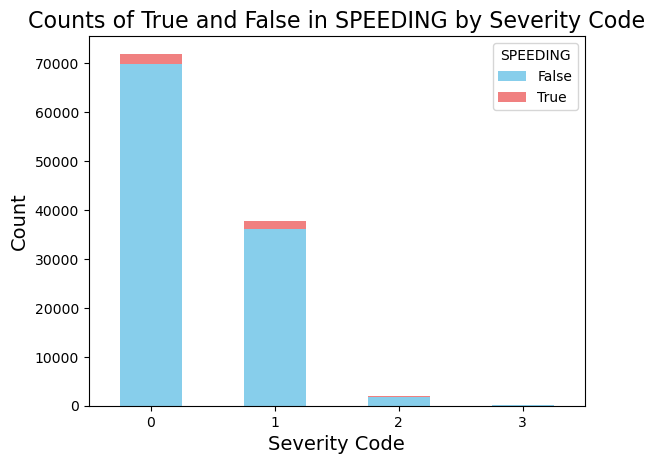

<Figure size 1000x600 with 0 Axes>

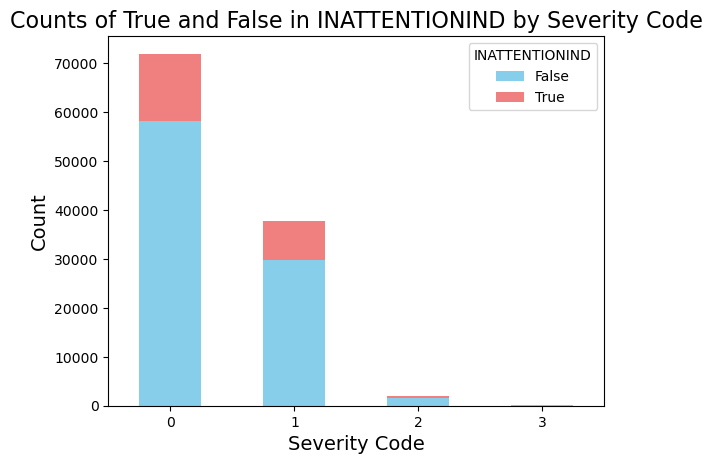

In [42]:
plt.figure(figsize=(10, 6))
count_by_severity.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'])
plt.xlabel('Severity Code', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Counts of True and False in UNDERINFL by Severity Code', fontsize=16)
plt.xticks(rotation=0)
plt.legend(['False', 'True'], title='UNDERINFL')
plt.show()

plt.figure(figsize=(10, 6))
count_by_severity_speed.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'])
plt.xlabel('Severity Code', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Counts of True and False in SPEEDING by Severity Code', fontsize=16)
plt.xticks(rotation=0)
plt.legend(['False', 'True'], title='SPEEDING')
plt.show()

plt.figure(figsize=(10, 6))
count_by_severity_inatten.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'])
plt.xlabel('Severity Code', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Counts of True and False in INATTENTIONIND by Severity Code', fontsize=16)
plt.xticks(rotation=0)
plt.legend(['False', 'True'], title='INATTENTIONIND')
plt.show()


In [ ]:
# Calculate the percentages for each severity code
percent_by_severity = count_by_severity.div(count_by_severity.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 6))
percent_by_severity.plot(kind='barh', stacked=True, color=['lightcoral', 'skyblue'])
plt.xlabel('Percentage', fontsize=12)
plt.ylabel('Severity Code', fontsize=12)
plt.title('Percentages of True and False in UNDERINFL by Severity Code', fontsize=12)
plt.legend(['False', 'True'], title='UNDERINFL')
plt.gca().invert_yaxis()  # Invert y-axis to have higher severity codes at the top
plt.show()

# Calculate the percentages for each severity code
percent_by_severity_speed = count_by_severity_speed.div(count_by_severity_speed.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 6))
percent_by_severity_speed.plot(kind='barh', stacked=True, color=['lightcoral', 'skyblue'])
plt.xlabel('Percentage', fontsize=12)
plt.ylabel('Severity Code', fontsize=12)
plt.title('Percentages of True and False in SPEEDING by Severity Code', fontsize=12)
plt.legend(['False', 'True'], title='SPEEDING')
plt.gca().invert_yaxis()  # Invert y-axis to have higher severity codes at the top
plt.show()

# Calculate the percentages for each severity code
percent_by_severity_inatten = count_by_severity_inatten.div(count_by_severity_speed.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 6))
percent_by_severity_inatten.plot(kind='barh', stacked=True, color=['lightcoral', 'skyblue'])
plt.xlabel('Percentage', fontsize=12)
plt.ylabel('Severity Code', fontsize=12)
plt.title('Percentages of True and False in INATTENTIONIND by Severity Code', fontsize=12)
plt.legend(['False', 'True'], title='INATTENTIONIND')
plt.gca().invert_yaxis()  
plt.show()


Importance of graphs showing the relationship of severity code and inattention while driving, speeding, and driving under the influence. The first set of graphs show the count for each variable within each severity code. The second set of graphs shows the percentage of true and false variables for inattention while driving, speeding, and driving under the influence for collision in each severity level. The graphs showing the counts make it difficult to compare the amounts between each severity level because there are way more collisions of severity level 1 than of 3. The graphs showing the pecentages within each severity code level are much more helpful when trying to compare the amount of true cases within each. The UNDERINFL graph shows that a much larger percent of collisions of the highest severity code involve driving unde the influence. This shows that collisions involving driving under the influence are usually very severe collisions, which is what we expected. The SPEEDING graph shows that a much larger amount of high severity accidents involve speeding than low severity accidents. Almost 20 percent of high severity accidents involve speeding, which is not surprising. From this it can be concluded that when speeding is involved, it is much more probable that the collision has a higher severity level. Lastly, the INATTENTIONIND graph shows a different trend from the previous two graphs. The majority of accidents involving inattentive drivers have severity levels of 0s and 1s meaning that if accident involves inattentive drivers it is most likcly a low severity accident. Specifically, about 20 percent of collisions involving inattentive drivers have seversity levels of 0 or 1. In conclusion, when comparing these three, is can be concluded that driving under the influence is most likely to result in a more severe accident than an accident involving speeding and especially inattentive driving. 

Sources:
We used the data visualization notebook from the github provived from class. When we had errors and could not get the example code to work, we used ChatGPT to guide through fixing our mistakes. 